In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import autocpd
import autocpd.utils
import matplotlib.pyplot as plt
np.random.seed(1)

In [2]:
# Specify the path to your model file
model_path = 'test_model/test_model.keras'

# Load the model
model = load_model(model_path)

# Display model summary
model.summary()

Model: "test_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,187 (12.45 KB)

 Trainable params: 1,062 (4.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,125 (8.30 KB)

In [3]:
n = 1000                             # Define sequence length
segment_lengths = [int(n/4), int(n/4), int(n/4), int(n/4)]  # Define the segment lengths, which should sum to n
means = [0, 2, 0, -2]                # Define the mean value for each segment

seq = []
for length, mean in zip(segment_lengths, means):                    # Loop through each segment length and mean
    segment = np.random.normal(loc=mean, scale=0.5, size=length)    # Generate a segment with the specified mean and add noise
    seq.extend(segment)                                        # Add this segment to the sequence

seq = np.array(seq)

In [4]:
labels = autocpd.utils.get_label(model, seq, model.input.shape[1])[0]

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [5]:
def find_segments(arr):
    segments = []
    start = None
    
    for i, val in enumerate(arr):
        if val == 1:
            if start is None:
                start = i  # Start a new segment
        else:
            if start is not None:
                segments.append((start, i - 1))  # End the current segment
                start = None
                
    if start is not None:
        segments.append((start, len(arr) - 1))  # End the last segment if it goes till the end

    return segments

find_segments(labels)

[(207, 465), (708, 950)]

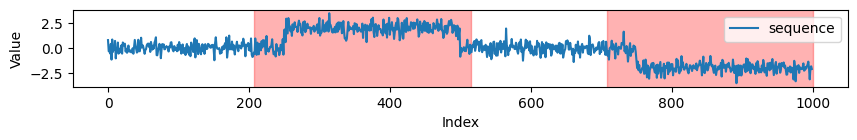

In [6]:
# Plot x_test
plt.figure(figsize=(10,1))
plt.plot(seq, label='sequence')

for rect_start, rect_end in find_segments(labels):
    plt.axvspan(rect_start, rect_end + model.input.shape[1], ymin=min(seq), ymax=max(seq), color='red', alpha=0.3)

# Show the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()